In [1]:
'''Code for fine-tuning Inception V3 for a new task.

Start with Inception V3 network, not including last fully connected layers.

Train a simple fully connected layer on top of these.


'''

import numpy as np
import pandas as pd
from keras import optimizers
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Flatten, Dropout
import keras.applications.inception_v3 as inception
import cnn_d as OurNetwork
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.pyplot as plt
IMSIZE = (196, 196)

PHOTO_PATH = r"\\devmachine\e$\data\katkam-secret-location\katkam-scaled"

def showImg(filename):
    img = image.load_img(PHOTO_PATH+"/"+filename, target_size=IMSIZE)
    x = image.img_to_array(img)
    plt.imshow(img)
    plt.show()

Using TensorFlow backend.


In [2]:
cleaned_data = pd.read_csv("cleaned_data.csv")
weather_array = list(map(lambda x:x.split(',') ,cleaned_data["Mapped"].values))
mlb = MultiLabelBinarizer()
Y = mlb.fit_transform(weather_array)
cleaned_data["Y"] = list(Y)

cleaned_data
print(mlb.classes_)

['Clear' 'Cloudy' 'Fog' 'Rain' 'Snow']


In [3]:
cleaned_data[cleaned_data.apply(lambda x: x["Y"][2]==1,axis = 1)]

Date/Time  Year  Month  Day Time_x                   Filename  \
112   2016-06-23 08:00:00  2016      6   23  08:00  katkam-20160623080000.jpg   
113   2016-06-23 09:00:00  2016      6   23  09:00  katkam-20160623090000.jpg   
200   2016-07-09 06:00:00  2016      7    9  06:00  katkam-20160709060000.jpg   
332   2016-08-03 06:00:00  2016      8    3  06:00  katkam-20160803060000.jpg   
359   2016-08-09 07:00:00  2016      8    9  07:00  katkam-20160809070000.jpg   
360   2016-08-09 08:00:00  2016      8    9  08:00  katkam-20160809080000.jpg   
361   2016-08-09 10:00:00  2016      8    9  10:00  katkam-20160809100000.jpg   
362   2016-08-09 11:00:00  2016      8    9  11:00  katkam-20160809110000.jpg   
450   2016-08-29 06:00:00  2016      8   29  06:00  katkam-20160829060000.jpg   
451   2016-08-29 07:00:00  2016      8   29  07:00  katkam-20160829070000.jpg   
452   2016-08-29 08:00:00  2016      8   29  08:00  katkam-20160829080000.jpg   
453   2016-08-29 09:00:00  2016      8   29  09:00  katkam-20160829090000.jpg   
489   2016-09-03 06:00:00  2016      9    3  06:00  katkam-20160903060000.jpg   
565   2016-09-17 06:00:00  2016      9   17  06:00  katkam-20160917060000.jpg   
568   2016-09-17 09:00:00  2016      9   17  09:00  katkam-20160917090000.jpg   
581   2016-09-19 08:00:00  2016      9   19  08:00  katkam-20160919080000.jpg   
604   2016-09-23 06:00:00  2016      9   23  06:00  katkam-20160923060000.jpg   
605   2016-09-23 07:00:00  2016      9   23  07:00  katkam-20160923070000.jpg   
687   2016-10-06 19:00:00  2016     10    6  19:00  katkam-20161006190000.jpg   
703   2016-10-08 16:00:00  2016     10    8  16:00  katkam-20161008160000.jpg   
704   2016-10-08 17:00:00  2016     10    8  17:00  katkam-20161008170000.jpg   
736   2016-10-14 07:00:00  2016     10   14  07:00  katkam-20161014070000.jpg   
737   2016-10-14 08:00:00  2016     10   14  08:00  katkam-20161014080000.jpg   
742   2016-10-14 13:00:00  2016     10   14  13:00  katkam-20161014130000.jpg   
743   2016-10-14 14:00:00  2016     10   14  14:00  katkam-20161014140000.jpg   
750   2016-10-15 12:00:00  2016     10   15  12:00  katkam-20161015120000.jpg   
751   2016-10-15 13:00:00  2016     10   15  13:00  katkam-20161015130000.jpg   
766   2016-10-17 08:00:00  2016     10   17  08:00  katkam-20161017080000.jpg   
767   2016-10-17 09:00:00  2016     10   17  09:00  katkam-20161017090000.jpg   
854   2016-10-29 11:00:00  2016     10   29  11:00  katkam-20161029110000.jpg   
...                   ...   ...    ...  ...    ...                        ...   
1606  2017-03-13 08:00:00  2017      3   13  08:00  katkam-20170313080000.jpg   
1612  2017-03-14 07:00:00  2017      3   14  07:00  katkam-20170314070000.jpg   
1613  2017-03-14 08:00:00  2017      3   14  08:00  katkam-20170314080000.jpg   
1650  2017-03-21 07:00:00  2017      3   21  07:00  katkam-20170321070000.jpg   
1686  2017-03-26 11:00:00  2017      3   26  11:00  katkam-20170326110000.jpg   
1693  2017-03-27 07:00:00  2017      3   27  07:00  katkam-20170327070000.jpg   
1702  2017-03-28 08:00:00  2017      3   28  08:00  katkam-20170328080000.jpg   
1712  2017-03-28 18:00:00  2017      3   28  18:00  katkam-20170328180000.jpg   
1717  2017-03-29 10:00:00  2017      3   29  10:00  katkam-20170329100000.jpg   
1718  2017-03-29 11:00:00  2017      3   29  11:00  katkam-20170329110000.jpg   
1719  2017-03-29 12:00:00  2017      3   29  12:00  katkam-20170329120000.jpg   
1732  2017-04-01 06:00:00  2017      4    1  06:00  katkam-20170401060000.jpg   
1734  2017-04-01 08:00:00  2017      4    1  08:00  katkam-20170401080000.jpg   
1765  2017-04-05 13:00:00  2017      4    5  13:00  katkam-20170405130000.jpg   
1948  2017-05-03 12:00:00  2017      5    3  12:00  katkam-20170503120000.jpg   
1949  2017-05-03 13:00:00  2017      5    3  13:00  katkam-20170503130000.jpg   
1996  2017-05-11 11:00:00  2017      5   11  11:00  katkam-20170511110000.jpg   
2030  2017-05-15 17:00:00  2017      5   15  17

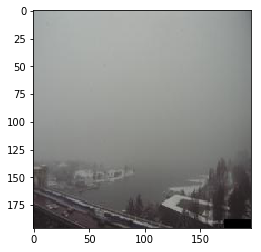

In [4]:
showImg("katkam-20161209130000.jpg")

In [5]:
#
def balance_data (df):
    clear_days_mask = df.apply(lambda x: x["Y"][0]==1,axis = 1)
    clear_days = df[clear_days_mask]
    non_clear_days = df[~clear_days_mask].sample(len(clear_days))
    final_data = clear_days.append(non_clear_days)
    final_data["Y2"] = cleaned_data.apply(lambda x: [x["Y"][0],(x["Y"][0]+1)%2],axis = 1)
    final_data = final_data.sample(frac=1)
    return final_data
final_data = balance_data(cleaned_data)

In [6]:
def sub_balanced_data(df):
    foggy_days  = cleaned_data[cleaned_data.apply(lambda x: x["Y"][2]==1,axis = 1)]
    rainy_days  = cleaned_data[cleaned_data.apply(lambda x: x["Y"][3]==1,axis = 1)]
    snowy_days  = cleaned_data[cleaned_data.apply(lambda x: x["Y"][4]==1,axis = 1)]
    just_cloudy_days  = cleaned_data[cleaned_data.apply(lambda x: (x["Y"][2]==0) and (x["Y"][3]==0) and (x["Y"][4]==0),axis = 1)]
    samples_per_label = len(snowy_days)
    final_data = foggy_days.sample(samples_per_label).append(rainy_days.sample(samples_per_label))
    final_data = final_data.append(snowy_days.sample(samples_per_label))
    final_data = final_data.append(just_cloudy_days.sample(samples_per_label))
    return final_data
# cleaned_data["Y3"] = cleaned_data.apply(lambda x: x["Y"],axis = 1)
cleaned_data["Y2"] = cleaned_data.apply(lambda x: [x["Y"][0],(x["Y"][0]+1)%2],axis = 1)
cleaned_data["Y3"] = cleaned_data.apply(lambda x: list(x["Y"])[2:5],axis = 1)
final_data = sub_balanced_data(cleaned_data)
train_test_mask = np.random.rand(len(final_data)) < 0.8
train_data = final_data[train_test_mask]
test_data = final_data[~train_test_mask]

In [7]:
# train_test_mask = np.random.rand(len(final_data)) < 0.8
# train_data = final_data[train_test_mask]
# test_data = final_data[~train_test_mask]
# test_data

In [8]:
# base_model = inception.InceptionV3(weights='imagenet')
# # Turn off training on base model layers
# for layer in base_model.layers:
#     layer.trainable = False
# # k=base_model.get_layer('flatten').output
# # Add on new fully connected layers for the output classes.
# x = Dense(1024, activation='relu')(base_model.get_layer('block3_pool').output)
# x = Dropout(0.5)(x)
# predictions = Dense(2, activation='softmax', name='predictions')(x)

# model = Model(inputs=base_model.input, outputs=predictions)

# model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [9]:
# Start with an Inception V3 model, not including the final softmax layer.
base_model = OurNetwork.network(classes = 2)
for layer in base_model.layers:
    layer.trainable = False
x = Flatten(name='sub_flatten')(base_model.get_layer('block3_pool').output)
x = Dense(64, activation='relu', name='sub_fc1')(x)
x = Dropout(0.3)(x)
sub_predictions = Dense(3, activation='sigmoid', name='sub_predictions')(x)
predictions = (base_model.get_layer('predictions').output)
model = Model(inputs=base_model.input, outputs=[predictions, sub_predictions])
# optimizer = optimizers.SGD(lr=0.005, momentum=0.1, decay=0.0, nesterov=True)
model.compile(loss='binary_crossentropy', optimizer="adam", loss_weights={'predictions': 0, 'sub_predictions': 1}, metrics=['accuracy'])
# model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

# print ('Loaded Inception model')

print(model.summary())

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 196, 196, 3)   0                                            
____________________________________________________________________________________________________
block1_conv1 (Conv2D)            (None, 196, 196, 16)  448         input_1[0][0]                    
____________________________________________________________________________________________________
block1_conv2 (Conv2D)            (None, 196, 196, 16)  2320        block1_conv1[0][0]               
____________________________________________________________________________________________________
block1_pool (MaxPooling2D)       (None, 98, 98, 16)    0           block1_conv2[0][0]               
___________________________________________________________________________________________

In [20]:

#print(val_files)
# np.random.seed(0)
img_datagen = ImageDataGenerator(width_shift_range=0.2,height_shift_range=0.2)

def my_load_img(img_path,img_datagen,size):
    img = image.load_img(img_path, target_size=size)
    x = image.img_to_array(img)
    x = img_datagen.random_transform(x)
    x = img_datagen.standardize(x)
    return x
def my_img_generator(df,img_datagen,batch_size):
#     index_array = np.random.permutation(len(files))
    
    index = 0
    count = 0
    img_datas=[]
    img_labels=[]
    img_sub_labels =[]
    while 1:
        # create numpy arrays of input data
        # and labels, from each line in the file
        item = df.iloc[index]
        if count < batch_size:
            img_datas.append(my_load_img(PHOTO_PATH+"/"+item["Filename"],img_datagen,IMSIZE))
#             [np.array(one_hot_labels),np.array(img_bboxes)]
            img_labels.append(item["Y2"])
            img_sub_labels.append(item["Y3"])

#             img_labels.append([np.array(item["Y2"]),np.array(item["Y3"])])

            index=(index+1)%df.shape[0]
            count+=1
        else:
            count=0
            yield (np.array(img_datas),[np.array(img_labels),np.array(img_sub_labels)])
                # yield (np.array(img_datas),np.array(img_bboxes))
#             else:
#                 yield (np.array(img_datas),np.array(one_hot_labels))
            img_datas = []
            img_labels = []
            img_sub_labels =[]
            img_bboxes=[]
#             random.shuffle(files)
            

batch_size=128
# t = next(my_img_generator(train_files,img_datagen,batch_size))

# model.load_weights('catdog_pretrain_nf.h5') 
# train_data
# train_data.shape
my_train_generator = my_img_generator(train_data,img_datagen,batch_size)
my_test_generator = my_img_generator(test_data,img_datagen,batch_size)
# next(my_train_generator)[1][0]
# train_datagen = ImageDataGenerator(rescale=1./255)
# train_generator = train_datagen.flow_from_directory(
#         r'E:\workshare\Mind\A3\data\catdog',  # this is the target directory
#         target_size=IMSIZE,  # all images will be resized to 299x299 Inception V3 input
#         batch_size=batch_size,
#         class_mode='categorical')

#test_datagen = ImageDataGenerator(rescale=1./255)
# test_generator = test_datagen.flow_from_directory(
#         test_dir,  # this is the target directory
#         target_size=IMSIZE,  # all images will be resized to 299x299 Inception V3 input
#         batch_size=batch_size,
#         class_mode='categorical')
# train_data.shape
# print(next(train_generator)[1])
# print(next(my_train_generator)[1])

# print(a[1].shape)
# print(a[1])

In [21]:

model.load_weights('sub_cnn_b.h5',by_name=True)
# model.save_weights('cnn_c.h5') 

for i in range(50):
    '''Refresh data'''
    final_data = sub_balanced_data(cleaned_data)
    train_test_mask = np.random.rand(len(final_data)) < 0.8
    train_data = final_data[train_test_mask]
    test_data = final_data[~train_test_mask]
    my_train_generator = my_img_generator(train_data,img_datagen,batch_size)
    my_test_generator = my_img_generator(test_data,img_datagen,batch_size)
    
    model.fit_generator(
            my_train_generator,
            steps_per_epoch = 5,
            epochs = 10,
            validation_data = my_test_generator,
            verbose = 2,
            validation_steps = 5)
    model.save_weights('sub_cnn_b.h5') 


Epoch 1/10
16s - loss: 0.2973 - predictions_loss: 0.0715 - sub_predictions_loss: 0.2973 - predictions_acc: 0.9625 - sub_predictions_acc: 0.8615 - val_loss: 0.2643 - val_predictions_loss: 0.0488 - val_sub_predictions_loss: 0.2643 - val_predictions_acc: 0.9719 - val_sub_predictions_acc: 0.8755
Epoch 2/10
9s - loss: 0.3085 - predictions_loss: 0.0718 - sub_predictions_loss: 0.3085 - predictions_acc: 0.9672 - sub_predictions_acc: 0.8479 - val_loss: 0.2528 - val_predictions_loss: 0.0452 - val_sub_predictions_loss: 0.2528 - val_predictions_acc: 0.9812 - val_sub_predictions_acc: 0.8797
Epoch 3/10
9s - loss: 0.2764 - predictions_loss: 0.0808 - sub_predictions_loss: 0.2764 - predictions_acc: 0.9625 - sub_predictions_acc: 0.8859 - val_loss: 0.2521 - val_predictions_loss: 0.0463 - val_sub_predictions_loss: 0.2521 - val_predictions_acc: 0.9719 - val_sub_predictions_acc: 0.8813
Epoch 4/10
9s - loss: 0.2781 - predictions_loss: 0.0923 - sub_predictions_loss: 0.2781 - predictions_acc: 0.9469 - sub_pred

9s - loss: 0.2542 - predictions_loss: 0.0679 - sub_predictions_loss: 0.2542 - predictions_acc: 0.9734 - sub_predictions_acc: 0.8880 - val_loss: 0.2911 - val_predictions_loss: 0.0440 - val_sub_predictions_loss: 0.2911 - val_predictions_acc: 0.9836 - val_sub_predictions_acc: 0.8620
Epoch 1/10
16s - loss: 0.2902 - predictions_loss: 0.0496 - sub_predictions_loss: 0.2902 - predictions_acc: 0.9797 - sub_predictions_acc: 0.8646 - val_loss: 0.2763 - val_predictions_loss: 0.0470 - val_sub_predictions_loss: 0.2763 - val_predictions_acc: 0.9734 - val_sub_predictions_acc: 0.8849
Epoch 2/10
9s - loss: 0.2796 - predictions_loss: 0.0444 - sub_predictions_loss: 0.2796 - predictions_acc: 0.9734 - sub_predictions_acc: 0.8703 - val_loss: 0.2659 - val_predictions_loss: 0.0418 - val_sub_predictions_loss: 0.2659 - val_predictions_acc: 0.9828 - val_sub_predictions_acc: 0.8880
Epoch 3/10
9s - loss: 0.2792 - predictions_loss: 0.0533 - sub_predictions_loss: 0.2792 - predictions_acc: 0.9766 - sub_predictions_acc

9s - loss: 0.2887 - predictions_loss: 0.0622 - sub_predictions_loss: 0.2887 - predictions_acc: 0.9688 - sub_predictions_acc: 0.8672 - val_loss: 0.2898 - val_predictions_loss: 0.0316 - val_sub_predictions_loss: 0.2898 - val_predictions_acc: 0.9828 - val_sub_predictions_acc: 0.8729
Epoch 10/10
9s - loss: 0.2730 - predictions_loss: 0.0828 - sub_predictions_loss: 0.2730 - predictions_acc: 0.9562 - sub_predictions_acc: 0.8802 - val_loss: 0.2872 - val_predictions_loss: 0.0298 - val_sub_predictions_loss: 0.2872 - val_predictions_acc: 0.9906 - val_sub_predictions_acc: 0.8682
Epoch 1/10
15s - loss: 0.3026 - predictions_loss: 0.0580 - sub_predictions_loss: 0.3026 - predictions_acc: 0.9734 - sub_predictions_acc: 0.8594 - val_loss: 0.2311 - val_predictions_loss: 0.0261 - val_sub_predictions_loss: 0.2311 - val_predictions_acc: 0.9844 - val_sub_predictions_acc: 0.8964
Epoch 2/10
9s - loss: 0.2922 - predictions_loss: 0.0519 - sub_predictions_loss: 0.2922 - predictions_acc: 0.9797 - sub_predictions_ac

9s - loss: 0.2660 - predictions_loss: 0.0548 - sub_predictions_loss: 0.2660 - predictions_acc: 0.9766 - sub_predictions_acc: 0.8771 - val_loss: 0.2519 - val_predictions_loss: 0.0610 - val_sub_predictions_loss: 0.2519 - val_predictions_acc: 0.9688 - val_sub_predictions_acc: 0.8849
Epoch 9/10
9s - loss: 0.2552 - predictions_loss: 0.0738 - sub_predictions_loss: 0.2552 - predictions_acc: 0.9594 - sub_predictions_acc: 0.8870 - val_loss: 0.2417 - val_predictions_loss: 0.0596 - val_sub_predictions_loss: 0.2417 - val_predictions_acc: 0.9688 - val_sub_predictions_acc: 0.8953
Epoch 10/10
9s - loss: 0.2652 - predictions_loss: 0.0607 - sub_predictions_loss: 0.2652 - predictions_acc: 0.9734 - sub_predictions_acc: 0.8703 - val_loss: 0.2218 - val_predictions_loss: 0.0698 - val_sub_predictions_loss: 0.2218 - val_predictions_acc: 0.9672 - val_sub_predictions_acc: 0.8995
Epoch 1/10
16s - loss: 0.2811 - predictions_loss: 0.0544 - sub_predictions_loss: 0.2811 - predictions_acc: 0.9703 - sub_predictions_ac

9s - loss: 0.2846 - predictions_loss: 0.0750 - sub_predictions_loss: 0.2846 - predictions_acc: 0.9711 - sub_predictions_acc: 0.8609 - val_loss: 0.2588 - val_predictions_loss: 0.0830 - val_sub_predictions_loss: 0.2588 - val_predictions_acc: 0.9461 - val_sub_predictions_acc: 0.8901
Epoch 8/10
9s - loss: 0.2769 - predictions_loss: 0.0664 - sub_predictions_loss: 0.2769 - predictions_acc: 0.9680 - sub_predictions_acc: 0.8813 - val_loss: 0.2617 - val_predictions_loss: 0.0796 - val_sub_predictions_loss: 0.2617 - val_predictions_acc: 0.9445 - val_sub_predictions_acc: 0.8859
Epoch 9/10
9s - loss: 0.2589 - predictions_loss: 0.0906 - sub_predictions_loss: 0.2589 - predictions_acc: 0.9578 - sub_predictions_acc: 0.8854 - val_loss: 0.2756 - val_predictions_loss: 0.0887 - val_sub_predictions_loss: 0.2756 - val_predictions_acc: 0.9344 - val_sub_predictions_acc: 0.8729
Epoch 10/10
9s - loss: 0.2737 - predictions_loss: 0.0664 - sub_predictions_loss: 0.2737 - predictions_acc: 0.9750 - sub_predictions_acc

9s - loss: 0.2877 - predictions_loss: 0.0410 - sub_predictions_loss: 0.2877 - predictions_acc: 0.9813 - sub_predictions_acc: 0.8646 - val_loss: 0.2366 - val_predictions_loss: 0.0675 - val_sub_predictions_loss: 0.2366 - val_predictions_acc: 0.9719 - val_sub_predictions_acc: 0.9010
Epoch 7/10
9s - loss: 0.2960 - predictions_loss: 0.0469 - sub_predictions_loss: 0.2960 - predictions_acc: 0.9719 - sub_predictions_acc: 0.8635 - val_loss: 0.2366 - val_predictions_loss: 0.0671 - val_sub_predictions_loss: 0.2366 - val_predictions_acc: 0.9656 - val_sub_predictions_acc: 0.8932
Epoch 8/10
9s - loss: 0.2775 - predictions_loss: 0.0506 - sub_predictions_loss: 0.2775 - predictions_acc: 0.9766 - sub_predictions_acc: 0.8792 - val_loss: 0.2390 - val_predictions_loss: 0.0625 - val_sub_predictions_loss: 0.2390 - val_predictions_acc: 0.9703 - val_sub_predictions_acc: 0.8932
Epoch 9/10
9s - loss: 0.2643 - predictions_loss: 0.0592 - sub_predictions_loss: 0.2643 - predictions_acc: 0.9703 - sub_predictions_acc:

9s - loss: 0.2550 - predictions_loss: 0.1210 - sub_predictions_loss: 0.2550 - predictions_acc: 0.9602 - sub_predictions_acc: 0.8839 - val_loss: 0.2230 - val_predictions_loss: 0.0532 - val_sub_predictions_loss: 0.2230 - val_predictions_acc: 0.9781 - val_sub_predictions_acc: 0.9083
Epoch 6/10
9s - loss: 0.2689 - predictions_loss: 0.0684 - sub_predictions_loss: 0.2689 - predictions_acc: 0.9719 - sub_predictions_acc: 0.8755 - val_loss: 0.2196 - val_predictions_loss: 0.0615 - val_sub_predictions_loss: 0.2196 - val_predictions_acc: 0.9766 - val_sub_predictions_acc: 0.9120
Epoch 7/10
9s - loss: 0.2669 - predictions_loss: 0.0814 - sub_predictions_loss: 0.2669 - predictions_acc: 0.9688 - sub_predictions_acc: 0.8745 - val_loss: 0.2260 - val_predictions_loss: 0.0638 - val_sub_predictions_loss: 0.2260 - val_predictions_acc: 0.9797 - val_sub_predictions_acc: 0.9047
Epoch 8/10
9s - loss: 0.2642 - predictions_loss: 0.0647 - sub_predictions_loss: 0.2642 - predictions_acc: 0.9703 - sub_predictions_acc:

10s - loss: 0.2772 - predictions_loss: 0.0482 - sub_predictions_loss: 0.2772 - predictions_acc: 0.9789 - sub_predictions_acc: 0.8724 - val_loss: 0.2875 - val_predictions_loss: 0.0331 - val_sub_predictions_loss: 0.2875 - val_predictions_acc: 0.9891 - val_sub_predictions_acc: 0.8672
Epoch 5/10
9s - loss: 0.2630 - predictions_loss: 0.0427 - sub_predictions_loss: 0.2630 - predictions_acc: 0.9813 - sub_predictions_acc: 0.8786 - val_loss: 0.2770 - val_predictions_loss: 0.0387 - val_sub_predictions_loss: 0.2770 - val_predictions_acc: 0.9859 - val_sub_predictions_acc: 0.8719
Epoch 6/10
9s - loss: 0.2782 - predictions_loss: 0.0531 - sub_predictions_loss: 0.2782 - predictions_acc: 0.9680 - sub_predictions_acc: 0.8724 - val_loss: 0.2864 - val_predictions_loss: 0.0350 - val_sub_predictions_loss: 0.2864 - val_predictions_acc: 0.9922 - val_sub_predictions_acc: 0.8630
Epoch 7/10
10s - loss: 0.2739 - predictions_loss: 0.0538 - sub_predictions_loss: 0.2739 - predictions_acc: 0.9766 - sub_predictions_ac

9s - loss: 0.2406 - predictions_loss: 0.1099 - sub_predictions_loss: 0.2406 - predictions_acc: 0.9641 - sub_predictions_acc: 0.8865 - val_loss: 0.2113 - val_predictions_loss: 0.0501 - val_sub_predictions_loss: 0.2113 - val_predictions_acc: 0.9734 - val_sub_predictions_acc: 0.9193
Epoch 4/10
9s - loss: 0.2653 - predictions_loss: 0.0846 - sub_predictions_loss: 0.2653 - predictions_acc: 0.9672 - sub_predictions_acc: 0.8693 - val_loss: 0.2098 - val_predictions_loss: 0.0376 - val_sub_predictions_loss: 0.2098 - val_predictions_acc: 0.9797 - val_sub_predictions_acc: 0.9115
Epoch 5/10
9s - loss: 0.2625 - predictions_loss: 0.0823 - sub_predictions_loss: 0.2625 - predictions_acc: 0.9703 - sub_predictions_acc: 0.8714 - val_loss: 0.2185 - val_predictions_loss: 0.0351 - val_sub_predictions_loss: 0.2185 - val_predictions_acc: 0.9844 - val_sub_predictions_acc: 0.9135
Epoch 6/10
9s - loss: 0.2356 - predictions_loss: 0.1162 - sub_predictions_loss: 0.2356 - predictions_acc: 0.9625 - sub_predictions_acc:

9s - loss: 0.2691 - predictions_loss: 0.0637 - sub_predictions_loss: 0.2691 - predictions_acc: 0.9688 - sub_predictions_acc: 0.8708 - val_loss: 0.1993 - val_predictions_loss: 0.0579 - val_sub_predictions_loss: 0.1993 - val_predictions_acc: 0.9609 - val_sub_predictions_acc: 0.9370
Epoch 3/10
9s - loss: 0.2503 - predictions_loss: 0.0730 - sub_predictions_loss: 0.2503 - predictions_acc: 0.9562 - sub_predictions_acc: 0.8859 - val_loss: 0.2161 - val_predictions_loss: 0.0488 - val_sub_predictions_loss: 0.2161 - val_predictions_acc: 0.9719 - val_sub_predictions_acc: 0.9224
Epoch 4/10
9s - loss: 0.2547 - predictions_loss: 0.0696 - sub_predictions_loss: 0.2547 - predictions_acc: 0.9625 - sub_predictions_acc: 0.8813 - val_loss: 0.2173 - val_predictions_loss: 0.0543 - val_sub_predictions_loss: 0.2173 - val_predictions_acc: 0.9719 - val_sub_predictions_acc: 0.9203
Epoch 5/10
9s - loss: 0.2568 - predictions_loss: 0.0785 - sub_predictions_loss: 0.2568 - predictions_acc: 0.9586 - sub_predictions_acc:

Epoch 1/10
15s - loss: 0.2544 - predictions_loss: 0.0534 - sub_predictions_loss: 0.2544 - predictions_acc: 0.9813 - sub_predictions_acc: 0.8740 - val_loss: 0.2294 - val_predictions_loss: 0.1072 - val_sub_predictions_loss: 0.2294 - val_predictions_acc: 0.9406 - val_sub_predictions_acc: 0.8995
Epoch 2/10
9s - loss: 0.2475 - predictions_loss: 0.0476 - sub_predictions_loss: 0.2475 - predictions_acc: 0.9734 - sub_predictions_acc: 0.8802 - val_loss: 0.2395 - val_predictions_loss: 0.1042 - val_sub_predictions_loss: 0.2395 - val_predictions_acc: 0.9359 - val_sub_predictions_acc: 0.8969
Epoch 3/10
9s - loss: 0.2482 - predictions_loss: 0.0497 - sub_predictions_loss: 0.2482 - predictions_acc: 0.9766 - sub_predictions_acc: 0.8797 - val_loss: 0.2418 - val_predictions_loss: 0.0915 - val_sub_predictions_loss: 0.2418 - val_predictions_acc: 0.9484 - val_sub_predictions_acc: 0.8865
Epoch 4/10
9s - loss: 0.2626 - predictions_loss: 0.0613 - sub_predictions_loss: 0.2626 - predictions_acc: 0.9734 - sub_pred

9s - loss: 0.2630 - predictions_loss: 0.0475 - sub_predictions_loss: 0.2630 - predictions_acc: 0.9773 - sub_predictions_acc: 0.8786 - val_loss: 0.2057 - val_predictions_loss: 0.0947 - val_sub_predictions_loss: 0.2057 - val_predictions_acc: 0.9578 - val_sub_predictions_acc: 0.9094
Epoch 1/10
15s - loss: 0.2736 - predictions_loss: 0.0384 - sub_predictions_loss: 0.2736 - predictions_acc: 0.9875 - sub_predictions_acc: 0.8714 - val_loss: 0.2688 - val_predictions_loss: 0.0659 - val_sub_predictions_loss: 0.2688 - val_predictions_acc: 0.9594 - val_sub_predictions_acc: 0.8833
Epoch 2/10
9s - loss: 0.2670 - predictions_loss: 0.0386 - sub_predictions_loss: 0.2670 - predictions_acc: 0.9859 - sub_predictions_acc: 0.8698 - val_loss: 0.2684 - val_predictions_loss: 0.0705 - val_sub_predictions_loss: 0.2684 - val_predictions_acc: 0.9563 - val_sub_predictions_acc: 0.8760
Epoch 3/10
9s - loss: 0.2684 - predictions_loss: 0.0337 - sub_predictions_loss: 0.2684 - predictions_acc: 0.9891 - sub_predictions_acc

9s - loss: 0.2440 - predictions_loss: 0.0862 - sub_predictions_loss: 0.2440 - predictions_acc: 0.9688 - sub_predictions_acc: 0.8786 - val_loss: 0.2474 - val_predictions_loss: 0.0681 - val_sub_predictions_loss: 0.2474 - val_predictions_acc: 0.9641 - val_sub_predictions_acc: 0.9036
Epoch 10/10
9s - loss: 0.2485 - predictions_loss: 0.0802 - sub_predictions_loss: 0.2485 - predictions_acc: 0.9641 - sub_predictions_acc: 0.8740 - val_loss: 0.2594 - val_predictions_loss: 0.0516 - val_sub_predictions_loss: 0.2594 - val_predictions_acc: 0.9719 - val_sub_predictions_acc: 0.8880
Epoch 1/10
15s - loss: 0.2403 - predictions_loss: 0.0689 - sub_predictions_loss: 0.2403 - predictions_acc: 0.9703 - sub_predictions_acc: 0.8880 - val_loss: 0.2045 - val_predictions_loss: 0.0612 - val_sub_predictions_loss: 0.2045 - val_predictions_acc: 0.9703 - val_sub_predictions_acc: 0.9146
Epoch 2/10
9s - loss: 0.2581 - predictions_loss: 0.0612 - sub_predictions_loss: 0.2581 - predictions_acc: 0.9688 - sub_predictions_ac

9s - loss: 0.2397 - predictions_loss: 0.1005 - sub_predictions_loss: 0.2397 - predictions_acc: 0.9656 - sub_predictions_acc: 0.8901 - val_loss: 0.1908 - val_predictions_loss: 0.0832 - val_sub_predictions_loss: 0.1908 - val_predictions_acc: 0.9602 - val_sub_predictions_acc: 0.9099
Epoch 9/10
9s - loss: 0.2515 - predictions_loss: 0.1180 - sub_predictions_loss: 0.2515 - predictions_acc: 0.9500 - sub_predictions_acc: 0.8875 - val_loss: 0.1987 - val_predictions_loss: 0.0777 - val_sub_predictions_loss: 0.1987 - val_predictions_acc: 0.9695 - val_sub_predictions_acc: 0.9036
Epoch 10/10
11s - loss: 0.2546 - predictions_loss: 0.0911 - sub_predictions_loss: 0.2546 - predictions_acc: 0.9531 - sub_predictions_acc: 0.8906 - val_loss: 0.1986 - val_predictions_loss: 0.0798 - val_sub_predictions_loss: 0.1986 - val_predictions_acc: 0.9594 - val_sub_predictions_acc: 0.8995
Epoch 1/10
17s - loss: 0.2636 - predictions_loss: 0.0571 - sub_predictions_loss: 0.2636 - predictions_acc: 0.9773 - sub_predictions_a

KeyboardInterrupt: 

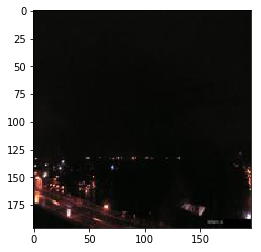

Predicted: [array([[  9.63400907e-06,   9.99992490e-01]], dtype=float32), array([[ 0.45382008,  0.58619583,  0.48254925]], dtype=float32)]


In [12]:
img_path = PHOTO_PATH+"/"+"katkam-20161126060000.jpg"
model.load_weights('sub_cnn.h5') 

img = image.load_img(img_path , target_size=IMSIZE)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

# x = inception.preprocess_input(x)
# x = image.img_to_array(img)
# x = img_datagen.random_transform(x)
x = img_datagen.standardize(x)
preds = model.predict(x)
plt.imshow(img)
plt.show()
print('Predicted:', preds)
# [Clear, Cloudy, Fog, Rain, Snow]

In [13]:
pics = cleaned_data.loc[cleaned_data["Mapped"].str.contains("Fog")]
# fig = plt.figure()
# fig.add_subplot(221)
# img = image.load_img(img_path , target_size=IMSIZE)
# plt.imshow(img)

# fig.add_subplot(222)


# img2 = image.load_img(PHOTO_PATH+"/"+ "katkam-20160829060000.jpg", target_size=IMSIZE)

# plt.imshow(img2)
# fig.add_subplot(223)
# plt.imshow(img2)

# plt.show()
def listPhotots(photos):
    for p in photos:
        plt.figure(figsize=(8,8))
        img = image.load_img(PHOTO_PATH+"/"+ p, target_size=IMSIZE)
        plt.imshow(img)
        plt.show()
        print(p)
# listPhotots(cleaned_data[cleaned_data["Mapped"].str.contains("Snow")]["Filename"].values)
20160709060000
# listPhotots(["katkam-20160709060000.jpg"])
# listPhotots(cleaned_data[(cleaned_data["Month"] ==11)
#                         ]["Filename"].values)
cleaned_data[(cleaned_data["Mapped"].str.contains("Snow"))]

Date/Time  Year  Month  Day Time_x                   Filename  \
1100  2016-12-05 06:00:00  2016     12    5  06:00  katkam-20161205060000.jpg   
1101  2016-12-05 07:00:00  2016     12    5  07:00  katkam-20161205070000.jpg   
1102  2016-12-05 08:00:00  2016     12    5  08:00  katkam-20161205080000.jpg   
1103  2016-12-05 09:00:00  2016     12    5  09:00  katkam-20161205090000.jpg   
1104  2016-12-05 10:00:00  2016     12    5  10:00  katkam-20161205100000.jpg   
1105  2016-12-05 11:00:00  2016     12    5  11:00  katkam-20161205110000.jpg   
1106  2016-12-05 12:00:00  2016     12    5  12:00  katkam-20161205120000.jpg   
1123  2016-12-09 07:00:00  2016     12    9  07:00  katkam-20161209070000.jpg   
1124  2016-12-09 08:00:00  2016     12    9  08:00  katkam-20161209080000.jpg   
1125  2016-12-09 09:00:00  2016     12    9  09:00  katkam-20161209090000.jpg   
1126  2016-12-09 10:00:00  2016     12    9  10:00  katkam-20161209100000.jpg   
1127  2016-12-09 12:00:00  2016     12    9  12:00  katkam-20161209120000.jpg   
1128  2016-12-09 13:00:00  2016     12    9  13:00  katkam-20161209130000.jpg   
1129  2016-12-09 14:00:00  2016     12    9  14:00  katkam-20161209140000.jpg   
1130  2016-12-09 15:00:00  2016     12    9  15:00  katkam-20161209150000.jpg   
1131  2016-12-09 16:00:00  2016     12    9  16:00  katkam-20161209160000.jpg   
1132  2016-12-09 17:00:00  2016     12    9  17:00  katkam-20161209170000.jpg   
1148  2016-12-12 06:00:00  2016     12   12  06:00  katkam-20161212060000.jpg   
1149  2016-12-12 07:00:00  2016     12   12  07:00  katkam-20161212070000.jpg   
1173  2016-12-18 06:00:00  2016     12   18  06:00  katkam-20161218060000.jpg   
1174  2016-12-18 07:00:00  2016     12   18  07:00  katkam-20161218070000.jpg   
1175  2016-12-18 08:00:00  2016     12   18  08:00  katkam-20161218080000.jpg   
1176  2016-12-18 09:00:00  2016     12   18  09:00  katkam-20161218090000.jpg   
1177  2016-12-18 10:00:00  2016     12   18  10:00  katkam-20161218100000.jpg   
1178  2016-12-18 11:00:00  2016     12   18  11:00  katkam-20161218110000.jpg   
1179  2016-12-18 12:00:00  2016     12   18  12:00  katkam-20161218120000.jpg   
1180  2016-12-18 13:00:00  2016     12   18  13:00  katkam-20161218130000.jpg   
1181  2016-12-18 14:00:00  2016     12   18  14:00  katkam-20161218140000.jpg   
1182  2016-12-18 15:00:00  2016     12   18  15:00  katkam-20161218150000.jpg   
1183  2016-12-18 16:00:00  2016     12   18  16:00  katkam-20161218160000.jpg   
...                   ...   ...    ...  ...    ...                        ...   
1391  2017-02-04 17:00:00  2017      2    4  17:00  katkam-20170204170000.jpg   
1392  2017-02-05 16:00:00  2017      2    5  16:00  katkam-20170205160000.jpg   
1393  2017-02-06 06:00:00  2017      2    6  06:00  katkam-20170206060000.jpg   
1394  2017-02-06 07:00:00  2017      2    6  07:00  katkam-20170206070000.jpg   
1395  2017-02-06 08:00:00  2017      2    6  08:00  katkam-20170206080000.jpg   
1398  2017-02-06 15:00:00  2017      2    6  15:00  katkam-20170206150000.jpg   
1399  2017-02-06 16:00:00  2017      2    6  16:00  katkam-20170206160000.jpg   
1400  2017-02-06 17:00:00  2017      2    6  17:00  katkam-20170206170000.jpg   
1401  2017-02-07 06:00:00  2017      2    7  06:00  katkam-20170207060000.jpg   
1408  2017-02-08 12:00:00  2017      2    8  12:00  katkam-20170208120000.jpg   
1410  2017-02-08 14:00:00  2017      2    8  14:00  katkam-20170208140000.jpg   
1411  2017-02-08 15:00:00  2017      2    8  15:00  katkam-20170208150000.jpg   
1412  2017-02-08 16:00:00  2017      2    8  16:00  katkam-20170208160000.jpg   
1413  2017-02-08 17:00:00  2017      2    8  17:00  katkam-20170208170000.jpg   
1512  2017-02-27 08:00:00  2017      2   27  08:00  katkam-20170227080000.jpg   
1513  2017-02-27 09:00:00  2017      2   27  09:00  katkam-20170227090000.jpg   
1514  2017-02-27 10:00:00  2017      2   27  10:00  katkam-20170227100000.jpg   
1517  2017-02-28 07:00:00  2017      2   28  07

In [23]:
def batchPredict(imageNames):
    result = []
    for filename in imageNames:
        img_path = PHOTO_PATH+"/"+filename
        img = image.load_img(img_path , target_size=IMSIZE)
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = img_datagen.standardize(x)
        preds = model.predict(x)
        result.append([preds[0].reshape(2),preds[1].reshape(3)])
    return result

def get_Y3_Label(preds):
    y3_label = ""
    if(preds[0][0]>0.5):
        return "Clear"
    else:
        if(preds[1][0]>0.5):
            y3_label+="Fog"
        if(preds[1][1]>0.5):
            y3_label+=" Rain"
        if(preds[1][2]>0.5):
            y3_label+=" Snow"
        if(y3_label == ""):
            y3_label="Cloudy"
    return y3_label

def get_predicted_y(preds):
    y = [0, 0, 0, 0,0]
    if(preds[0][0]>0.5):
        y[0] = 1
    else:
        flag = False
        if(preds[1][0]>0.5):
            y[2] = 1
            flag = True
        if(preds[1][1]>0.5):
            y[3]=1
            y[1] = 1
            flag = True
        if(preds[1][2]>0.5):
            y[4]=1
            y[1] = 1
            flag = True
        if (~flag):
            y[1]=1
    return y

sample_data = cleaned_data
print("Predicting ", len(sample_data)," images")
sample_data["Predict_combined"] = batchPredict(sample_data["Filename"].values)
sample_data["Predict_Y2_Label"] = sample_data["Predict_combined"].apply(lambda x: "Clear" if x[0][0]>0.5 else "Non_Clear")
sample_data["Predict_Y3_Label"] = sample_data["Predict_combined"].apply(lambda x: get_Y3_Label(x))
sample_data["Predict_Y"] = sample_data["Predict_combined"].apply(lambda x: get_predicted_y(x))
sample_data

Predicting  2248  images


Date/Time  Year  Month  Day Time_x                   Filename  \
0     2016-06-05 07:00:00  2016      6    5  07:00  katkam-20160605070000.jpg   
1     2016-06-05 10:00:00  2016      6    5  10:00  katkam-20160605100000.jpg   
2     2016-06-05 13:00:00  2016      6    5  13:00  katkam-20160605130000.jpg   
3     2016-06-05 16:00:00  2016      6    5  16:00  katkam-20160605160000.jpg   
4     2016-06-05 19:00:00  2016      6    5  19:00  katkam-20160605190000.jpg   
5     2016-06-06 07:00:00  2016      6    6  07:00  katkam-20160606070000.jpg   
6     2016-06-06 10:00:00  2016      6    6  10:00  katkam-20160606100000.jpg   
7     2016-06-06 13:00:00  2016      6    6  13:00  katkam-20160606130000.jpg   
8     2016-06-06 16:00:00  2016      6    6  16:00  katkam-20160606160000.jpg   
9     2016-06-06 19:00:00  2016      6    6  19:00  katkam-20160606190000.jpg   
10    2016-06-07 07:00:00  2016      6    7  07:00  katkam-20160607070000.jpg   
11    2016-06-07 10:00:00  2016      6    7  10:00  katkam-20160607100000.jpg   
12    2016-06-07 13:00:00  2016      6    7  13:00  katkam-20160607130000.jpg   
13    2016-06-07 16:00:00  2016      6    7  16:00  katkam-20160607160000.jpg   
14    2016-06-07 19:00:00  2016      6    7  19:00  katkam-20160607190000.jpg   
15    2016-06-08 07:00:00  2016      6    8  07:00  katkam-20160608070000.jpg   
16    2016-06-08 10:00:00  2016      6    8  10:00  katkam-20160608100000.jpg   
17    2016-06-08 12:00:00  2016      6    8  12:00  katkam-20160608120000.jpg   
18    2016-06-08 13:00:00  2016      6    8  13:00  katkam-20160608130000.jpg   
19    2016-06-08 16:00:00  2016      6    8  16:00  katkam-20160608160000.jpg   
20    2016-06-08 19:00:00  2016      6    8  19:00  katkam-20160608190000.jpg   
21    2016-06-09 07:00:00  2016      6    9  07:00  katkam-20160609070000.jpg   
22    2016-06-09 10:00:00  2016      6    9  10:00  katkam-20160609100000.jpg   
23    2016-06-09 13:00:00  2016      6    9  13:00  katkam-20160609130000.jpg   
24    2016-06-09 16:00:00  2016      6    9  16:00  katkam-20160609160000.jpg   
25    2016-06-09 19:00:00  2016      6    9  19:00  katkam-20160609190000.jpg   
26    2016-06-10 07:00:00  2016      6   10  07:00  katkam-20160610070000.jpg   
27    2016-06-10 10:00:00  2016      6   10  10:00  katkam-20160610100000.jpg   
28    2016-06-10 13:00:00  2016      6   10  13:00  katkam-20160610130000.jpg   
29    2016-06-10 16:00:00  2016      6   10  16:00  katkam-20160610160000.jpg   
...                   ...   ...    ...  ...    ...                        ...   
2218  2017-06-16 07:00:00  2017      6   16  07:00  katkam-20170616070000.jpg   
2219  2017-06-16 10:00:00  2017      6   16  10:00  katkam-20170616100000.jpg   
2220  2017-06-16 13:00:00  2017      6   16  13:00  katkam-20170616130000.jpg   
2221  2017-06-16 16:00:00  2017      6   16  16:00  katkam-20170616160000.jpg   
2222  2017-06-16 19:00:00  2017      6   16  19:00  katkam-20170616190000.jpg   
2223  2017-06-17 07:00:00  2017      6   17  07:00  katkam-20170617070000.jpg   
2224  2017-06-17 10:00:00  2017      6   17  10:00  katkam-20170617100000.jpg   
2225  2017-06-17 13:00:00  2017      6   17  13:00  katkam-20170617130000.jpg   
2226  2017-06-17 16:00:00  2017      6   17  16:00  katkam-20170617160000.jpg   
2227  2017-06-17 18:00:00  2017      6   17  18:00  katkam-20170617180000.jpg   
2228  2017-06-17 19:00:00  2017      6   17  19:00  katkam-20170617190000.jpg   
2229  2017-06-18 07:00:00  2017      6   18  07:00  katkam-20170618070000.jpg   
2230  2017-06-18 08:00:00  2017      6   18  08:00  katkam-20170618080000.jpg   
2231  2017-06-18 09:00:00  2017      6   18  09:00  katkam-20170618090000.jpg   
2232  2017-06-18 10:00:00  2017      6   18  10:00  katkam-20170618100000.jpg   
2233  2017-06-18 11:00:00  2017      6   18  11:00  katkam-20170618110000.jpg   
2234  2017-06-18 13:00:00  2017      6   18  13:00  katkam-20170618130000.jpg   
2235  2017-06-18 16:00:00  2017      6   18  16

In [25]:
from sklearn.metrics import accuracy_score
print("\n\n##############################")
print("Accuracy score: ")
print(accuracy_score(np.stack(sample_data["Y"].values),np.stack(sample_data["Predict_Y"].values)))
print("##############################")
print("Randomly printing 20 samples with their true Y and the predicted Y.")
print(sample_data.sample(20)[["Filename","Weather","Predict_Y2_Label","Predict_Y3_Label"]].to_string(index=True))




##############################
Accuracy score: 
0.728647686833
##############################
Randomly printing 20 samples with their true Y and the predicted Y.
                       Filename        Weather Predict_Y2_Label Predict_Y3_Label
1211  katkam-20161223140000.jpg           Rain        Non_Clear         Fog Rain
867   katkam-20161031090000.jpg       Rain,Fog        Non_Clear         Fog Rain
260   katkam-20160720100000.jpg   Mainly Clear            Clear            Clear
1297  katkam-20170118070000.jpg           Rain        Non_Clear             Rain
952   katkam-20161113100000.jpg           Rain        Non_Clear         Fog Rain
2045  katkam-20170518100000.jpg         Cloudy        Non_Clear           Cloudy
117   katkam-20160623190000.jpg  Mostly Cloudy        Non_Clear           Cloudy
1436  katkam-20170212130000.jpg   Mainly Clear            Clear            Clear
1597  katkam-20170312100000.jpg         Cloudy        Non_Clear             Rain
1973  katkam-2017050716000